### Gmarket
- 베스트 상품 200개 데이터 수집
- 상품의 이미지 200개 다운로드

In [28]:
import pandas as pd 
import requests 
from bs4 import BeautifulSoup

#### 1. URL 찾기

In [29]:
url = 'https://www.gmarket.co.kr/n/best'

#### 2. request > response : str(html)

In [30]:
response = requests.get(url)
response

<Response [200]>

In [31]:
dom = BeautifulSoup(response.text, 'html.parser')
type(dom)

bs4.BeautifulSoup

In [32]:
# 200개 상품 선택 : select()
elements = dom.select('#gBestWrap > div.best-list > ul > li')
len(elements), elements[0]

(200,
 <li class="first"><span class="box__corners-id"></span><p class="no1">1</p><div class="thumb"><a aria-hidden="true" href="http://item.gmarket.co.kr/Item?goodscode=3602543561&amp;ver=20240319" tabindex="-1"><img alt="((단하루 10%+10%쿠폰)) 시크릿무드 역마진 파격SALE/바람막이/자켓/원피스/니트/팬츠 외 미시룩BEST" class="image__lazy" decoding="async" height="210" loading="lazy" src="//gdimg.gmarket.co.kr/3602543561/still/300?ver=1710736690" width="210"/></a></div><a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=3602543561&amp;ver=20240319">((단하루 10%+10%쿠폰)) 시크릿무드 역마진 파격SALE/바람막이/자켓/원피스/니트/팬츠 외 미시룩BEST</a><div class="item_price"><div class="o-price"><span class="for-a11y">정가</span><span>33,000<!-- -->원</span></div><div class="s-price"><span class="for-a11y">할인가</span><strong><span>9,900<!-- -->원</span></strong> <span><span class="sale"></span><em>70<!-- -->%</em></span></div><div class="icon"><img alt="무료배송" src="//pics.gmkt.kr/pc/ko/corner/gbest/ic_freeshipping.gif"/></div></div></li>)

In [33]:
# 1개의 상품에서 데이터 추출 : select_one()

In [34]:
element = elements[0]
data = {'title':element.select_one('.itemname').text,
       'img': 'http:' + element.select_one('.image__lazy').get('src')}

data

{'title': '((단하루 10%+10%쿠폰)) 시크릿무드 역마진 파격SALE/바람막이/자켓/원피스/니트/팬츠 외 미시룩BEST',
 'img': 'http://gdimg.gmarket.co.kr/3602543561/still/300?ver=1710736690'}

#### 3. bs > DataFrame

In [38]:
items = []
for element in elements:
    data = {'title':element.select_one('.itemname').text,
       'img': 'http:' + element.select_one('.image__lazy').get('src'),
        'price': element.select_one('.s-price').text}
    items.append(data)
    
len(items), items[0]

(200,
 {'title': '((단하루 10%+10%쿠폰)) 시크릿무드 역마진 파격SALE/바람막이/자켓/원피스/니트/팬츠 외 미시룩BEST',
  'img': 'http://gdimg.gmarket.co.kr/3602543561/still/300?ver=1710736690',
  'price': '할인가9,900원 70%'})

In [39]:
df = pd.DataFrame(items)
df

,title,img,price
0,((단하루 10%+10%쿠폰)) 시크릿무드 역마진 파격SALE/바람막이/자켓/원피스...,http://gdimg.gmarket.co.kr/3602543561/still/30...,"할인가9,900원 70%"
1,[온더바디]온더바디 발을씻자 코튼풋샴푸 자몽향 385ml 4개,http://gdimg.gmarket.co.kr/1776265578/still/30...,"할인가19,900원 35%"
2,[트라이](무료반품/9950원/5매)트라이 스탠다드 베이직 남성 5번들 런닝 무료배...,http://gdimg.gmarket.co.kr/2967899929/still/30...,"할인가11,700원 70%"
3,[빕스](빕스) 15 000원 스프링 바우처 / 3월 19일부터 사용가능,http://gdimg.gmarket.co.kr/3598240685/still/30...,"할인가1,500원 90%"
4,[해드앤숄더]2개 헤드앤숄더 클리니컬 스트렝스 비듬방지 샴푸 3종 초록 보라 주황 ...,http://gdimg.gmarket.co.kr/3326914517/still/30...,"할인가30,570원 68%"
...,...,...,...
195,[비비고]비비고 CJ제일제당 순살고등어구이 60g X 10개,http://gdimg.gmarket.co.kr/3544203078/still/30...,"할인가25,650원 10%"
196,윌북/ 세계역사이야기 영어리딩훈련 특별세트(전9권),http://gdimg.gmarket.co.kr/3591894386/still/30...,"할인가101,080원 30%"
197,[코코리따]우리아이 간절기부터 여름까지 BEST ITEM 총정리 UP TO 82%,http://gdimg.gmarket.co.kr/2921236819/still/30...,"할인가6,900원 69%"
198,(5%+15% 7130원) 더빨강양말 10켤레 여성 남성 덧신/발목양말/단목/중목양...,http://gdimg.gmarket.co.kr/2839753828/still/30...,"할인가8,900원 69%"


#### 4. download image

In [40]:
link = df.loc[0, 'img']
link

'http://gdimg.gmarket.co.kr/3602543561/still/300?ver=1710736690'

In [41]:
response = requests.get(link)
response

<Response [200]>

In [42]:
#wb : write binary
with open('data.png', 'wb') as file:
    file.write(response.content)

In [43]:
%ls data.png

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: FCA9-41A6

 C:\Users\User\croling2 디렉터리

03/19/2024  04:43 PM             9,081 data.png
               1개 파일               9,081 바이트
               0개 디렉터리  158,651,723,776 바이트 남음


In [44]:
# pillow : 이미지 전처리 패키지
from PIL import Image as pil

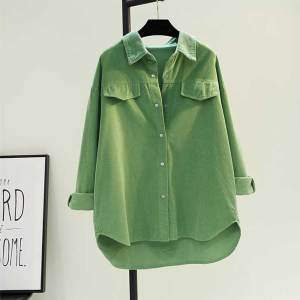

In [45]:
pil.open('data.png')

In [ ]:
# 크롤링정책
# robots.txt : 크롤링 정책을 설명한 페이지
# 지적재산권, 서비스과부화(업무방행, 피해보상). 데이터사용표준